In [1]:
library("factoextra")
options(repr.plot.width=12, repr.plot.height=13)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
path="C:/Users/Jordi/New_Jupyter/Jupyter"
setwd(path)
mydata = read.csv("data-all.csv", sep=";")

In [3]:
mydata = mydata[mydata$comp_opt != 'NF',]
mydata = mydata[mydata$comp_opt != 'O1',]
mydata = mydata[mydata$comp_opt != 'O0',]
mydata = mydata[mydata$label != '2D4PStencil_E',]
mydata = mydata[mydata$label != 'Reduction_E',]
mydata = mydata[mydata$label != '2PStencil_E',]

head(mydata)
unique(mydata[,"comp_opt"])

id,size_vector,comp_opt,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
1,30000000,O2,Copy_E,7506186,7263082,7258293,11989361,7263082,154342988,...,60622683,685044637,85,1300880,1970892,2053622,15324,3467,3467,15324
2,30000000,O2,Copy_E,7504612,7262535,7259435,12006689,7262535,155831189,...,60906735,679896951,46,1289810,1975892,2054583,14184,2585,2585,14184
3,30000000,O2,Copy_E,7504513,7259672,7256657,12029882,7259672,155976579,...,60824770,680176203,48,1288318,1975799,2054540,14539,2838,2838,14539
4,30000000,O2,Copy_E,7504531,7259552,7256565,12019150,7259552,155903369,...,60760474,680002746,47,1290408,1975062,2053632,14388,2691,2691,14388
5,30000000,O2,Copy_E,7504455,7260257,7257406,12012086,7260257,155785956,...,60752082,680638685,45,1293332,1977685,2056448,14303,2565,2565,14303
6,30000000,O2,Copy_E,7504655,7262011,7258802,12022105,7262011,155948636,...,60790603,681637009,45,1297857,1976265,2054810,14201,2629,2629,14201


[1] O2
Levels: O0 O1 O2

In [4]:
colnames(mydata)

[1] "id"           "size_vector"  "comp_opt"     "label"        "PAPI_L1_DCM" 
 [6] "PAPI_L2_TCM"  "PAPI_L3_TCM"  "PAPI_L2_TCA"  "PAPI_L3_TCA"  "PAPI_TOT_INS"
[11] "PAPI_REF_CYC" "PAPI_L2_TCH"  "PAPI_L1_TCM"  "PAPI_L2_ICH"  "PAPI_L1_ICA" 
[16] "PAPI_L1_ICR"  "PAPI_L1_ICH"  "PAPI_L2_DCA"  "PAPI_L3_LDM"  "PAPI_DP_OPS" 
[21] "PAPI_FP_INS"  "PAPI_VEC_SP"  "PAPI_VEC_DP"  "PAPI_SP_OPS"  "PAPI_L1_ICM" 
[26] "PAPI_L2_DCM"  "PAPI_L2_ICM"  "PAPI_L2_LDM"  "PAPI_L2_STM"  "PAPI_L3_DCA" 
[31] "PAPI_L3_DCR"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_NTK" 
[36] "PAPI_BR_INS"  "PAPI_TLB_DM"  "PAPI_TLB_IM"  "PAPI_TLB_TL"  "PAPI_L1_LDM" 
[41] "PAPI_L1_STM"  "PAPI_L2_DCR"  "PAPI_L2_DCW"  "PAPI_BR_MSP"  "PAPI_BR_PRC" 
[46] "PAPI_L3_TCW"  "PAPI_L3_DCW"  "PAPI_TOT_IIS" "PAPI_LD_INS"  "PAPI_SR_INS" 
[51] "PAPI_RES_STL" "PAPI_LST_INS" "PAPI_TOT_CYC" "PAPI_FP_OPS"  "PAPI_L2_TCW" 
[56] "PAPI_L3_TCR"  "PAPI_L2_TCR"  "PAPI_L2_ICR"  "PAPI_L3_ICR"  "PAPI_L3_ICA" 
[61] "PAPI_L2_ICA"

In [5]:
head(mydata)

id,size_vector,comp_opt,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
1,30000000,O2,Copy_E,7506186,7263082,7258293,11989361,7263082,154342988,...,60622683,685044637,85,1300880,1970892,2053622,15324,3467,3467,15324
2,30000000,O2,Copy_E,7504612,7262535,7259435,12006689,7262535,155831189,...,60906735,679896951,46,1289810,1975892,2054583,14184,2585,2585,14184
3,30000000,O2,Copy_E,7504513,7259672,7256657,12029882,7259672,155976579,...,60824770,680176203,48,1288318,1975799,2054540,14539,2838,2838,14539
4,30000000,O2,Copy_E,7504531,7259552,7256565,12019150,7259552,155903369,...,60760474,680002746,47,1290408,1975062,2053632,14388,2691,2691,14388
5,30000000,O2,Copy_E,7504455,7260257,7257406,12012086,7260257,155785956,...,60752082,680638685,45,1293332,1977685,2056448,14303,2565,2565,14303
6,30000000,O2,Copy_E,7504655,7262011,7258802,12022105,7262011,155948636,...,60790603,681637009,45,1297857,1976265,2054810,14201,2629,2629,14201


In [6]:
dfu <- unique(mydata$size_vector)
#dfu[order(dfu)]

comprss <- function(tx) { 
      div <- findInterval(as.numeric(gsub("\\,", "", tx)), 
                          c(1, 1e3, 1e6, 1e9, 1e12) )
      paste(round( as.numeric(gsub("\\,","",tx))/10^(3*(div-1)), 2), 
           c("","K","M","B","T")[div] )}
comprss(dfu[order(dfu)])



[1] "1 K"   "2 K"   "3 K"   "4 K"   "5 K"   "6 K"   "7 K"   "8 K"   "9 K"  
[10] "10 K"  "20 K"  "30 K"  "40 K"  "50 K"  "60 K"  "70 K"  "80 K"  "90 K" 
[19] "100 K" "200 K" "300 K" "400 K" "500 K" "600 K" "700 K" "800 K" "900 K"
[28] "1 M"   "2 M"   "3 M"   "4 M"   "5 M"   "6 M"   "7 M"   "8 M"   "9 M"  
[37] "10 M"  "20 M"  "30 M"  "40 M"  "50 M"  "60 M"  "70 M"  "80 M"  "90 M" 
[46] "100 M" "110 M" "120 M" "130 M" "140 M" "150 M" "160 M" "170 M" "180 M"
[55] "190 M" "200 M"

In [7]:
#print(new_mydata[,c("PAPI_VEC_SP","PAPI_VEC_DP")])
#print(mydata[,c("PAPI_VEC_SP","PAPI_SP_OPS")])

In [8]:
#div = mydata$PAPI_SP_OPS/mydata$PAPI_VEC_SP
#div <- na.omit(div)
#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN + mydata$PAPI_BR_UCN)

In [9]:
#mean(div)
#quantile(div,0.25)
#quantile(div,0.5)
#quantile(div,0.75)
#boxplot(div)

In [10]:
#print(mydata[,c("PAPI_BR_INS","PAPI_BR_CN","PAPI_BR_UCN")])#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN/mydata$PAPI_BR_UCN)
#print(subs)
#perc = subs/mydata$PAPI_BR_INS

#head(percent(perc[order(perc,decreasing = TRUE)]))

In [11]:
#all(new_mydata$PAPI_VEC_SP == new_mydata$PAPI_VEC_DP)
all(mydata$PAPI_DP_SP == mydata$PAPI_SP_OPS)

[1] TRUE

In [12]:
new_mydata = mydata[,5:61]
new_mydata <- subset(new_mydata, select = -c(PAPI_TOT_CYC))
new_mydata <- subset(new_mydata, select = -c(PAPI_TLB_DM))
new_mydata <- subset(new_mydata, select = -c(PAPI_FP_INS))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_INS))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_TCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_TLB_IM))
new_mydata <- subset(new_mydata, select = -c(PAPI_RES_STL))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_PRC))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_NTK))
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_DP))
new_mydata <- subset(new_mydata, select = -c(PAPI_SP_OPS))
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_SP))

dim(new_mydata)
colnames(new_mydata)

[1] 224000     20

[1] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L3_LDM" 
 [6] "PAPI_DP_OPS"  "PAPI_L2_LDM"  "PAPI_L2_STM"  "PAPI_BR_UCN"  "PAPI_BR_CN"  
[11] "PAPI_BR_TKN"  "PAPI_TLB_TL"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_BR_MSP" 
[16] "PAPI_TOT_IIS" "PAPI_LD_INS"  "PAPI_SR_INS"  "PAPI_LST_INS" "PAPI_FP_OPS"

In [13]:
new_mydata

,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L3_LDM,PAPI_DP_OPS,PAPI_L2_LDM,PAPI_L2_STM,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_TLB_TL,PAPI_L1_LDM,PAPI_L1_STM,PAPI_BR_MSP,PAPI_TOT_IIS,PAPI_LD_INS,PAPI_SR_INS,PAPI_LST_INS,PAPI_FP_OPS
1,7506186,7258293,154342988,683762580,1856203,11,1964552,1125291,8644,31733394,31203359,1792,2038703,1292758,27391,4683349,30591982,30030701,60622683,85
2,7504612,7259435,155831189,682068942,1862053,9,1969070,1125671,8252,32107420,31378706,974,2043569,1293122,25275,5972772,30877430,30029305,60906735,46
3,7504513,7256657,155976579,681824898,1863960,9,1968178,1122179,8257,32267769,31470783,905,2041555,1290591,26036,5669758,30795465,30029305,60824770,48
4,7504531,7256565,155903369,682132230,1863593,9,1966623,1119083,8248,31956457,31303460,833,2036938,1290931,25458,5266196,30731169,30029305,60760474,47
5,7504455,7257406,155785956,681756498,1859930,9,1973219,1124586,8257,31994035,31317097,888,2040495,1287850,24768,5130673,30722777,30029305,60752082,45
6,7504655,7258802,155948636,682244226,1863038,9,1972006,1122832,8276,32053620,31351186,860,2034221,1286393,25996,5424187,30761299,30029304,60790603,45
7,7504539,7256951,155755592,682272108,1862616,9,1973934,1123441,8226,32209078,31424135,889,2041049,1283914,26971,5147042,30715908,30029305,60745213,49
8,7504488,7257842,155684642,682204050,1868679,9,1968174,1117749,8272,32258196,31461518,859,2036990,1288429,25436,5165885,30746731,30029298,60776029,45
9,7504479,7257409,155608254,681584364,1865506,9,1970488,1120864,8256,32038289,31343203,909,2044447,1287607,25594,5603825,30789195,30029305,60818500,45
10,7504597,7259772,155721236,681531570,1867672,9,1968924,1119182,8291,32476914,31559599,850,2039344,1290225,25494,5984076,30848331,30029304,60877635,47


In [14]:
log.ir <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata[,4]
res.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)



In [15]:
print(res.pca)

Standard deviations (1, .., p=20):
 [1] 4.208799e+00 9.162808e-01 7.888755e-01 6.110907e-01 5.287465e-01
 [6] 3.779878e-01 1.393671e-01 8.585762e-02 2.996742e-02 1.939871e-02
[11] 9.837271e-03 5.556540e-03 4.016119e-03 3.603679e-03 2.670394e-03
[16] 1.760285e-03 9.727274e-04 1.631208e-04 1.519062e-04 7.543554e-15

Rotation (n x k) = (20 x 20):
                   PC1          PC2          PC3           PC4         PC5
PAPI_L1_DCM  0.2369167  0.041036807 -0.030330447 -0.0773226102  0.03639330
PAPI_L3_TCM  0.2362153  0.077487754 -0.034413020 -0.0921467426  0.03759265
PAPI_TOT_INS 0.2351107  0.036753481  0.011344355 -0.0458575226 -0.25524657
PAPI_REF_CYC 0.2366211  0.072179043 -0.021511144 -0.0805131140 -0.04469523
PAPI_L3_LDM  0.2021987  0.442739716 -0.132143447 -0.2074313229  0.51894921
PAPI_DP_OPS  0.2079420 -0.518146688  0.035699674  0.1172675650  0.02151399
PAPI_L2_LDM  0.2332512 -0.129206947 -0.040623036 -0.0419004277  0.25346240
PAPI_L2_STM  0.2349721 -0.054066315  0.015135432 -0.01

In [16]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [17]:
print(res.pca$sdev)

 [1] 4.208799e+00 9.162808e-01 7.888755e-01 6.110907e-01 5.287465e-01
 [6] 3.779878e-01 1.393671e-01 8.585762e-02 2.996742e-02 1.939871e-02
[11] 9.837271e-03 5.556540e-03 4.016119e-03 3.603679e-03 2.670394e-03
[16] 1.760285e-03 9.727274e-04 1.631208e-04 1.519062e-04 7.543554e-15


In [18]:
head(unclass(res.pca$rotation)[])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
PAPI_L1_DCM,0.2369167,0.04103681,-0.03033045,-0.07732261,0.03639330,0.065096829,-0.1603371,0.02114699,0.102581452,-0.16387826,-0.17825657,0.015242185,-0.2752013643,0.055082274,-0.0085192150,0.102030803,-8.630055e-01,1.208363e-02,-2.532159e-03,-4.406933e-14
PAPI_L3_TCM,0.2362153,0.07748775,-0.03441302,-0.09214674,0.03759265,0.065196737,-0.2748680,0.11680079,0.123972611,-0.37334395,0.31180420,0.102415802,0.2923337548,0.499992069,-0.0746124653,-0.477709119,4.438701e-02,-1.972457e-03,1.866701e-04,1.259727e-14
PAPI_TOT_INS,0.2351107,0.03675348,0.01134435,-0.04585752,-0.25524657,0.008592132,0.1044247,-0.22595057,0.005754145,-0.02243518,0.01303504,0.420741227,0.0013063130,-0.546344341,0.2806639973,-0.506083145,-5.321519e-02,3.166657e-03,-2.077162e-04,2.394170e-14
PAPI_REF_CYC,0.2366211,0.07217904,-0.02151114,-0.08051311,-0.04469523,0.047170023,-0.1011305,-0.05116953,0.083760590,-0.09491659,-0.19647512,0.309790677,0.6693690164,-0.184841418,-0.2263792173,0.480316335,3.339329e-03,-2.243768e-03,8.471326e-04,-1.016232e-14
PAPI_L3_LDM,0.2021987,0.44273972,-0.13214345,-0.20743132,0.51894921,0.095857317,0.6269028,0.04243419,-0.129914603,-0.08542229,0.07145009,0.003390217,-0.0009912454,-0.002400328,0.0005818038,0.002107145,-3.977903e-05,-7.734651e-06,-2.730633e-05,-6.371641e-16
PAPI_DP_OPS,0.2079420,-0.51814669,0.03569967,0.11726757,0.02151399,0.083602086,0.2691061,-0.14500558,-0.087672895,-0.22720643,0.05697797,-0.045232812,-0.0044574487,0.046785230,-0.0507554472,0.053519946,3.489969e-03,-1.255221e-02,7.070646e-01,4.132533e-16


In [19]:
# Eigenvalues
eig <- (res.pca$sdev)^2
print(eig)

 [1] 1.771399e+01 8.395705e-01 6.223246e-01 3.734318e-01 2.795729e-01
 [6] 1.428747e-01 1.942320e-02 7.371531e-03 8.980460e-04 3.763098e-04
[11] 9.677191e-05 3.087514e-05 1.612921e-05 1.298650e-05 7.131002e-06
[16] 3.098604e-06 9.461985e-07 2.660841e-08 2.307550e-08 5.690520e-29


In [20]:
# Variances in percentage
variance <- eig*100/sum(eig)
print(variance)

 [1] 8.856994e+01 4.197852e+00 3.111623e+00 1.867159e+00 1.397864e+00
 [6] 7.143737e-01 9.711599e-02 3.685765e-02 4.490230e-03 1.881549e-03
[11] 4.838596e-04 1.543757e-04 8.064606e-05 6.493252e-05 3.565501e-05
[16] 1.549302e-05 4.730993e-06 1.330420e-07 1.153775e-07 2.845260e-28


In [21]:
# Cumulative variances
cumvar <- cumsum(variance)
print(cumvar)

 [1]  88.56994  92.76779  95.87942  97.74658  99.14444  99.85881  99.95593
 [8]  99.99279  99.99728  99.99916  99.99964  99.99980  99.99988  99.99994
[15]  99.99998 100.00000 100.00000 100.00000 100.00000 100.00000


In [22]:
eig.decathlon2.active <- data.frame(eig = eig, variance = variance,cumvariance = cumvar)
print(eig.decathlon2.active)

            eig     variance cumvariance
1  1.771399e+01 8.856994e+01    88.56994
2  8.395705e-01 4.197852e+00    92.76779
3  6.223246e-01 3.111623e+00    95.87942
4  3.734318e-01 1.867159e+00    97.74658
5  2.795729e-01 1.397864e+00    99.14444
6  1.428747e-01 7.143737e-01    99.85881
7  1.942320e-02 9.711599e-02    99.95593
8  7.371531e-03 3.685765e-02    99.99279
9  8.980460e-04 4.490230e-03    99.99728
10 3.763098e-04 1.881549e-03    99.99916
11 9.677191e-05 4.838596e-04    99.99964
12 3.087514e-05 1.543757e-04    99.99980
13 1.612921e-05 8.064606e-05    99.99988
14 1.298650e-05 6.493252e-05    99.99994
15 7.131002e-06 3.565501e-05    99.99998
16 3.098604e-06 1.549302e-05   100.00000
17 9.461985e-07 4.730993e-06   100.00000
18 2.660841e-08 1.330420e-07   100.00000
19 2.307550e-08 1.153775e-07   100.00000
20 5.690520e-29 2.845260e-28   100.00000


In [23]:
summary(res.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     4.2088 0.91628 0.78888 0.61109 0.52875 0.37799 0.13937
Proportion of Variance 0.8857 0.04198 0.03112 0.01867 0.01398 0.00714 0.00097
Cumulative Proportion  0.8857 0.92768 0.95879 0.97747 0.99144 0.99859 0.99956
                           PC8     PC9    PC10     PC11     PC12     PC13
Standard deviation     0.08586 0.02997 0.01940 0.009837 0.005557 0.004016
Proportion of Variance 0.00037 0.00004 0.00002 0.000000 0.000000 0.000000
Cumulative Proportion  0.99993 0.99997 0.99999 1.000000 1.000000 1.000000
                           PC14    PC15    PC16      PC17      PC18      PC19
Standard deviation     0.003604 0.00267 0.00176 0.0009727 0.0001631 0.0001519
Proportion of Variance 0.000000 0.00000 0.00000 0.0000000 0.0000000 0.0000000
Cumulative Proportion  1.000000 1.00000 1.00000 1.0000000 1.0000000 1.0000000
                            PC20
Standard deviation   

In [24]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,17.7139884,88.5699421,88.56994
Dim.2,0.8395705,4.1978523,92.76779
Dim.3,0.6223246,3.1116230,95.87942
Dim.4,0.3734318,1.8671592,97.74658
Dim.5,0.2795729,1.3978643,99.14444
Dim.6,0.1428747,0.7143737,99.85881


In [25]:
options(repr.plot.width = 20, repr.plot.height = 10)

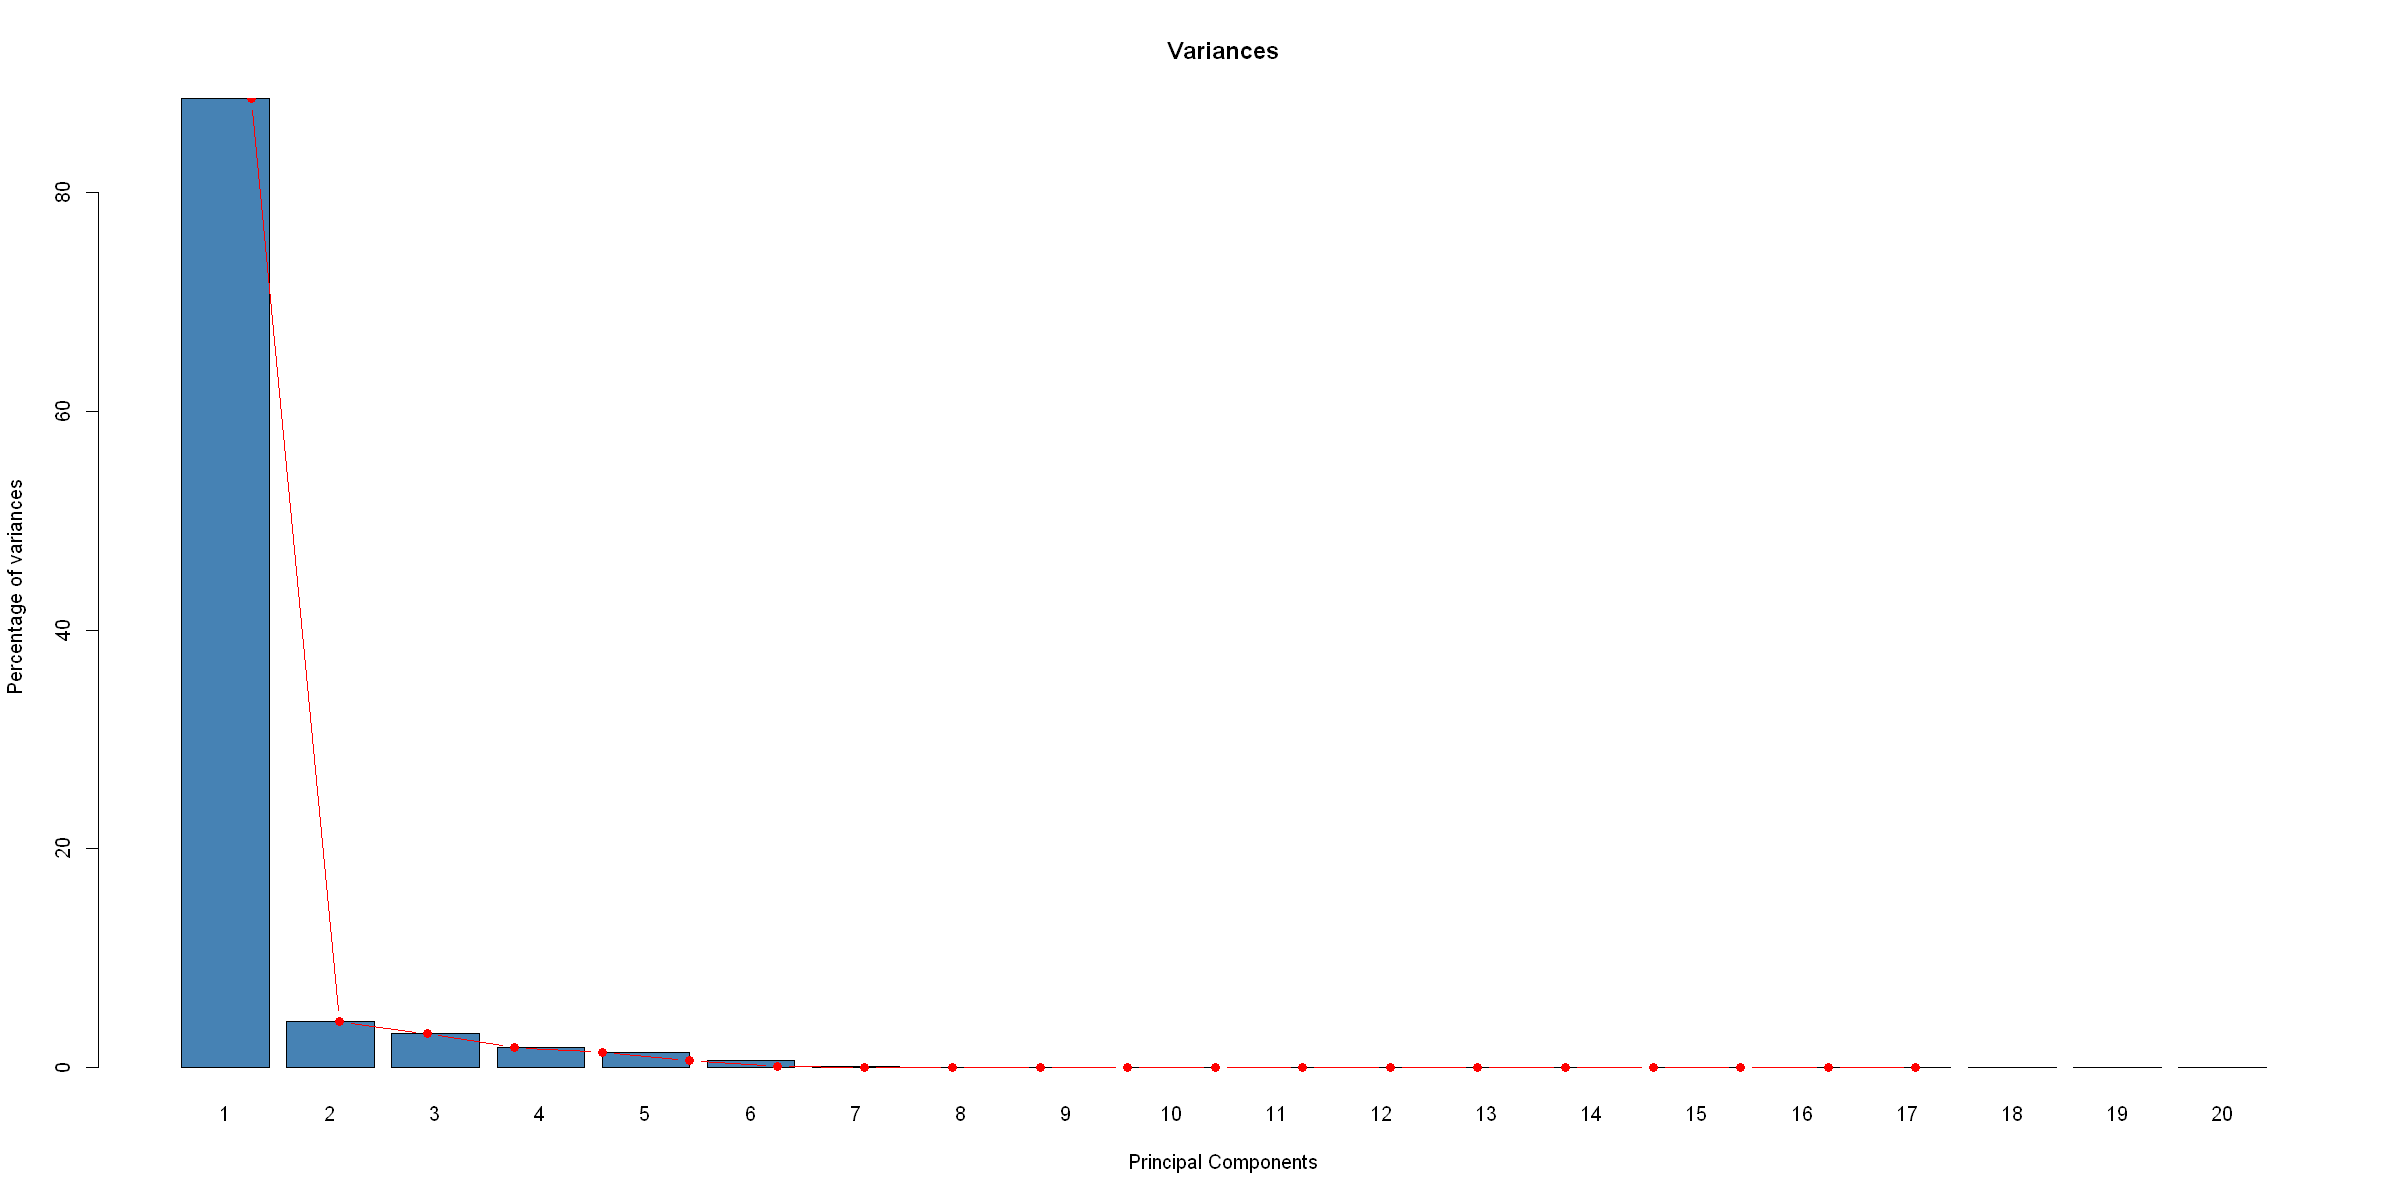

In [26]:
barplot(eig.decathlon2.active[, 2], names.arg=1:nrow(eig.decathlon2.active), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.decathlon2.active), 
      eig.decathlon2.active[, 2], 
      type="b", pch=19, col = "red")

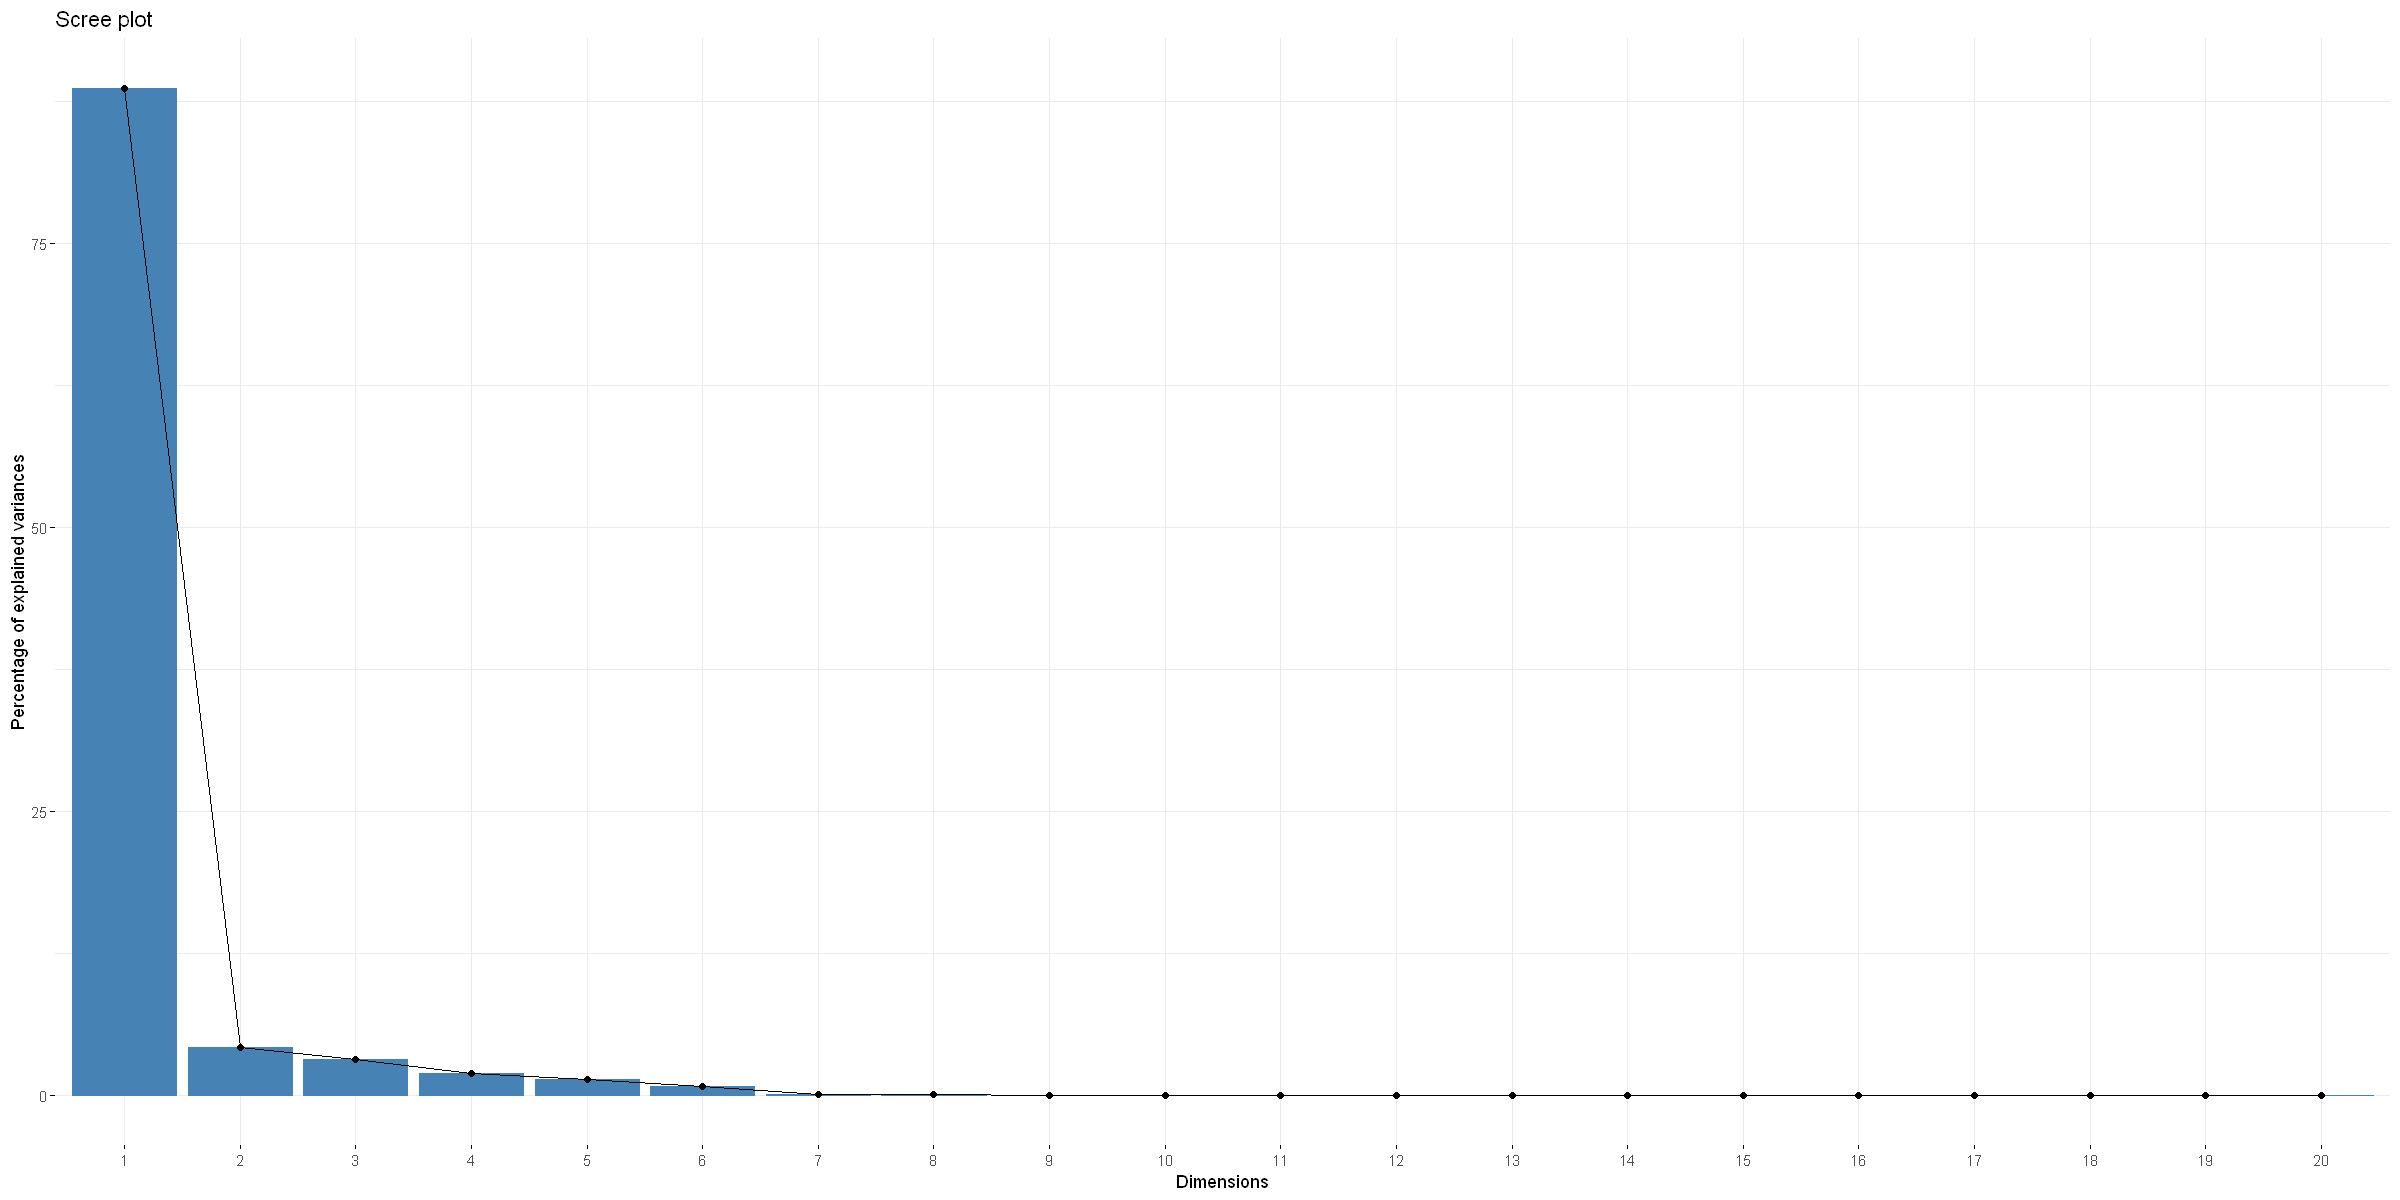

In [27]:
fviz_screeplot(res.pca, ncp=54)

In [28]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [29]:
var$coord


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17,Dim.18,Dim.19,Dim.20
PAPI_L1_DCM,0.9971349,0.037601237,-0.023926948,-0.0472511275,0.019242832,0.024605804,-0.022345729,1.815631e-03,0.0030741010,-3.179026e-03,-1.753558e-03,8.469381e-05,-1.105241e-03,1.984989e-04,-2.274966e-05,1.796033e-04,-8.394691e-04,1.971092e-06,-3.846508e-07,-3.324394e-28
PAPI_L3_TCM,0.9941827,0.071000539,-0.027147589,-0.0563100169,0.019876984,0.024643568,-0.038307571,1.002824e-02,0.0037151387,-7.242389e-03,3.067303e-03,5.690775e-04,1.174047e-03,1.801811e-03,-1.992447e-04,-8.409043e-04,4.317646e-05,-3.217488e-07,2.835635e-08,9.502816e-29
PAPI_TOT_INS,0.9895335,0.033676508,0.008949284,-0.0280231053,-0.134960735,0.003247721,0.014553369,-1.939958e-02,0.0001724369,-4.352135e-04,1.282293e-04,2.337866e-03,5.246309e-06,-1.968850e-03,7.494834e-04,-8.908507e-04,-5.176387e-05,5.165477e-07,-3.155339e-08,1.806055e-28
PAPI_REF_CYC,0.9958905,0.066136269,-0.016969615,-0.0492008147,-0.023632445,0.017829691,-0.014094268,-4.393294e-03,0.0025100884,-1.841259e-03,-1.932779e-03,1.721364e-03,2.688266e-03,-6.661092e-04,-6.045216e-04,8.454938e-04,3.248256e-06,-3.660054e-07,1.286847e-07,-7.665998e-29
PAPI_L3_LDM,0.8510138,0.405673888,-0.104244732,-0.1267593511,0.274392580,0.036232892,0.087369645,3.643299e-03,-0.0038932048,-1.657082e-03,7.028739e-04,1.883787e-05,-3.980960e-06,-8.650012e-06,1.553645e-06,3.709176e-06,-3.869415e-08,-1.261683e-09,-4.148003e-09,-4.806482e-30
PAPI_DP_OPS,0.8751861,-0.474767847,0.028162599,0.0716611177,0.011375448,0.031600565,0.037504549,-1.244983e-02,-0.0026273300,-4.407510e-03,5.605077e-04,-2.513379e-04,-1.790164e-05,1.685990e-04,-1.355370e-04,9.421037e-05,3.394789e-06,-2.047527e-06,1.074075e-04,3.117398e-30
PAPI_L2_LDM,0.9817074,-0.118389841,-0.032046519,-0.0256049614,0.134017357,0.041575860,-0.026144793,-4.441816e-03,0.0091386358,6.510499e-03,5.631631e-03,1.011904e-04,-3.033519e-05,-2.323420e-04,1.162047e-03,5.101944e-04,-1.448510e-06,1.444209e-07,3.148118e-09,-3.012877e-29
PAPI_L2_STM,0.9889504,-0.049539925,0.011939972,-0.0079730892,-0.126182834,0.013439187,0.013424111,5.487025e-02,0.0003047849,3.127220e-03,3.210629e-03,-9.288557e-05,-5.471734e-04,-1.002278e-03,-1.297697e-03,-3.203164e-05,-1.539069e-05,-6.387770e-08,-9.119275e-09,-1.858281e-29
PAPI_BR_UCN,0.6568292,0.203012103,0.677975319,0.2490266572,0.072815223,0.019799182,-0.001625358,-1.477906e-05,0.0001798846,-1.552771e-05,-1.997671e-06,1.109411e-05,-2.879474e-06,3.746457e-06,-1.202208e-06,7.596267e-07,-1.204750e-07,6.956848e-10,2.461217e-10,-1.110442e-30
PAPI_BR_CN,0.9709977,0.164699696,0.004063413,-0.0523477802,-0.163741433,-0.003905502,0.007017774,-1.967628e-02,0.0007176512,5.636873e-04,6.339268e-04,-3.938814e-03,9.185966e-04,-3.748586e-04,8.515011e-05,-9.945293e-05,-6.843231e-05,-6.835946e-05,-1.235806e-06,8.083755e-29


Loading required package: plyr
Loading required package: scales
Loading required package: grid


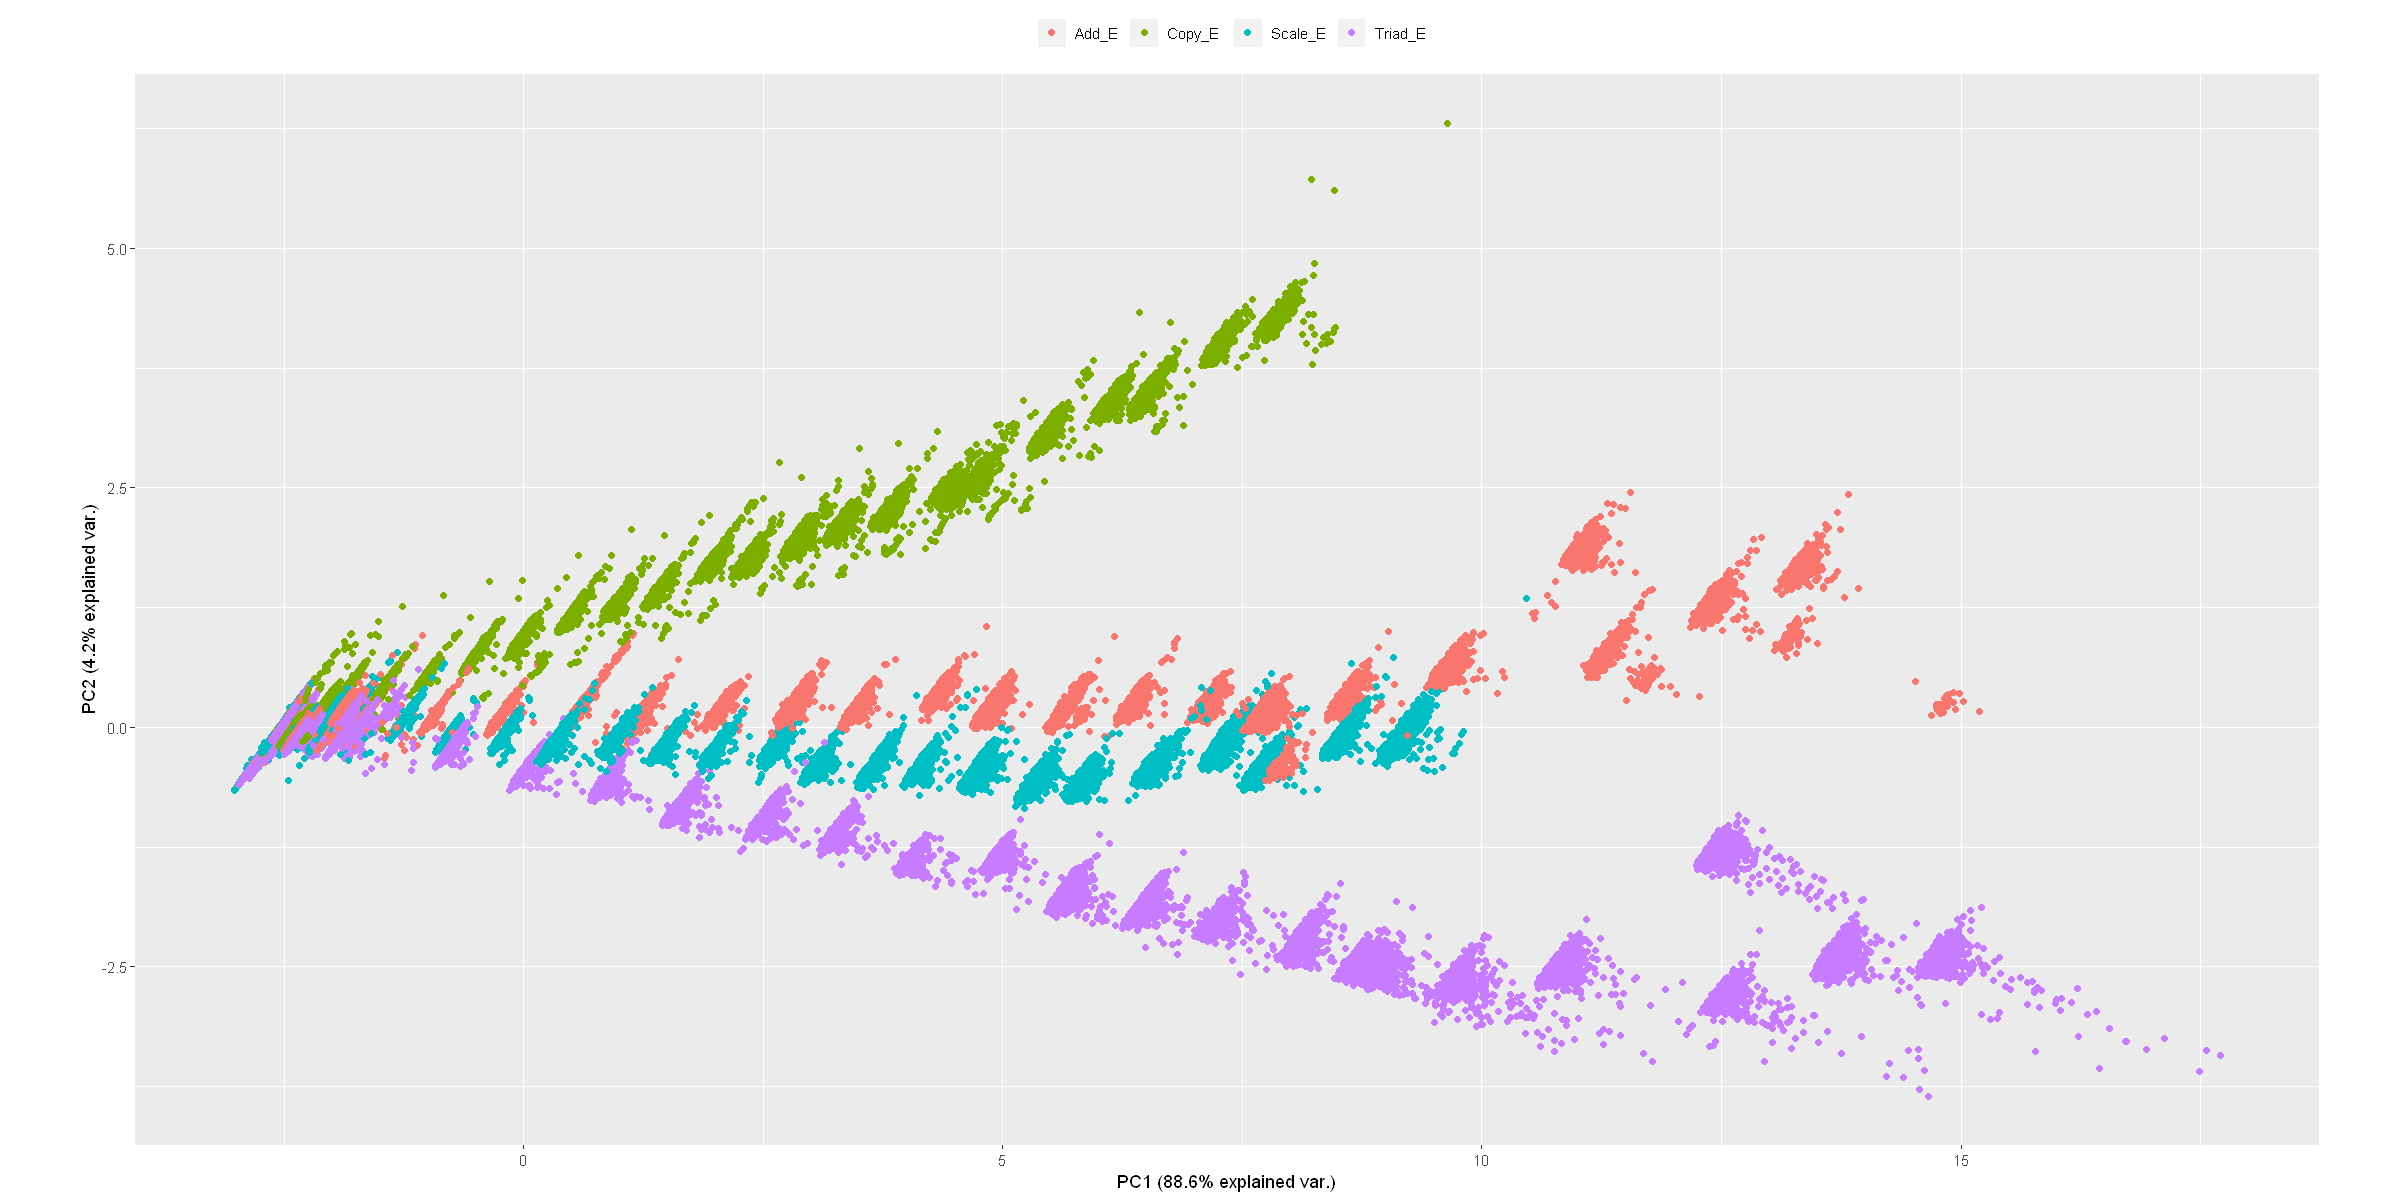

In [30]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)

In [31]:
# Helper function : 
# Correlation between variables and principal components
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
  }

# Variable correlation/coordinates
loadings <- res.pca$rotation
sdev <- res.pca$sdev

var.coord <- var.cor <- t(apply(loadings, 1, var_cor_func, sdev))
print(var.coord[, 1:4])

                   PC1          PC2          PC3           PC4
PAPI_L1_DCM  0.9971349  0.037601237 -0.023926948 -0.0472511275
PAPI_L3_TCM  0.9941827  0.071000539 -0.027147589 -0.0563100169
PAPI_TOT_INS 0.9895335  0.033676508  0.008949284 -0.0280231053
PAPI_REF_CYC 0.9958905  0.066136269 -0.016969615 -0.0492008147
PAPI_L3_LDM  0.8510138  0.405673888 -0.104244732 -0.1267593511
PAPI_DP_OPS  0.8751861 -0.474767847  0.028162599  0.0716611177
PAPI_L2_LDM  0.9817074 -0.118389841 -0.032046519 -0.0256049614
PAPI_L2_STM  0.9889504 -0.049539925  0.011939972 -0.0079730892
PAPI_BR_UCN  0.6568292  0.203012103  0.677975319  0.2490266572
PAPI_BR_CN   0.9709977  0.164699696  0.004063413 -0.0523477802
PAPI_BR_TKN  0.9709615  0.164758717  0.002759054 -0.0525325881
PAPI_TLB_TL  0.7514781  0.185417458 -0.376094069  0.5082846989
PAPI_L1_LDM  0.9772005 -0.153382363 -0.028463998 -0.0154963244
PAPI_L1_STM  0.9865819 -0.077279026  0.016652794 -0.0002349489
PAPI_BR_MSP  0.9951804 -0.006203527 -0.024005971 -0.040

In [32]:
var.cos2 <- var.coord^2
print(var.cos2)

                   PC1          PC2          PC3          PC4          PC5
PAPI_L1_DCM  0.9942780 1.413853e-03 5.724988e-04 2.232669e-03 0.0003702866
PAPI_L3_TCM  0.9883993 5.041077e-03 7.369916e-04 3.170818e-03 0.0003950945
PAPI_TOT_INS 0.9791765 1.134107e-03 8.008968e-05 7.852944e-04 0.0182143999
PAPI_REF_CYC 0.9917978 4.374006e-03 2.879678e-04 2.420720e-03 0.0005584925
PAPI_L3_LDM  0.7242246 1.645713e-01 1.086696e-02 1.606793e-02 0.0752912881
PAPI_DP_OPS  0.7659507 2.254045e-01 7.931320e-04 5.135316e-03 0.0001294008
PAPI_L2_LDM  0.9637495 1.401615e-02 1.026979e-03 6.556141e-04 0.0179606520
PAPI_L2_STM  0.9780228 2.454204e-03 1.425629e-04 6.357015e-05 0.0159221076
PAPI_BR_UCN  0.4314245 4.121391e-02 4.596505e-01 6.201428e-02 0.0053020567
PAPI_BR_CN   0.9428365 2.712599e-02 1.651132e-05 2.740290e-03 0.0268112570
PAPI_BR_TKN  0.9427663 2.714543e-02 7.612379e-06 2.759673e-03 0.0268708630
PAPI_TLB_TL  0.5647194 3.437963e-02 1.414467e-01 2.583533e-01 0.0000698516
PAPI_L1_LDM  0.9549209 2.

In [33]:
comp.cos2 <- apply(var.cos2, 2, sum)

contrib <- function(var.cos2, comp.cos2){var.cos2*100/comp.cos2}

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
print(var.contrib)

                  PC1          PC2          PC3          PC4         PC5
PAPI_L1_DCM  5.612954  0.168401951 9.199360e-02 5.978786e-01  0.13244725
PAPI_L3_TCM  5.579767  0.600435206 1.184256e-01 8.491022e-01  0.14132075
PAPI_TOT_INS 5.527702  0.135081839 1.286944e-02 2.102912e-01  6.51508139
PAPI_REF_CYC 5.598953  0.520981419 4.627293e-02 6.482362e-01  0.19976633
PAPI_L3_LDM  4.088433 19.601845585 1.746189e+00 4.302775e+00 26.93082794
PAPI_DP_OPS  4.323988 26.847599069 1.274467e-01 1.375168e+00  0.04628518
PAPI_L2_LDM  5.440613  1.669443525 1.650231e-01 1.755646e-01  6.42431866
PAPI_L2_STM  5.521189  0.292316641 2.290813e-02 1.702323e-02  5.69515479
PAPI_BR_UCN  2.435502  4.908928613 7.386025e+01 1.660659e+01  1.89648472
PAPI_BR_CN   5.322554  3.230936713 2.653169e-03 7.338127e-01  9.59007831
PAPI_BR_TKN  5.322157  3.233252781 1.223217e-03 7.390031e-01  9.61139870
PAPI_TLB_TL  3.187985  4.094907542 2.272877e+01 6.918353e+01  0.02498511
PAPI_L1_LDM  5.390773  2.802164991 1.301892e-01 6.4

In [34]:
print(sort(var.contrib[,'PC1'],decreasing=TRUE))

 PAPI_L1_DCM PAPI_LST_INS PAPI_REF_CYC  PAPI_BR_MSP  PAPI_L3_TCM PAPI_TOT_INS 
    5.612954     5.612854     5.598953     5.590972     5.579767     5.527702 
 PAPI_L2_STM  PAPI_LD_INS  PAPI_L1_STM  PAPI_L2_LDM  PAPI_L1_LDM   PAPI_BR_CN 
    5.521189     5.496771     5.494776     5.440613     5.390773     5.322554 
 PAPI_BR_TKN  PAPI_SR_INS PAPI_TOT_IIS  PAPI_FP_OPS  PAPI_DP_OPS  PAPI_L3_LDM 
    5.322157     5.318874     4.809194     4.323992     4.323988     4.088433 
 PAPI_TLB_TL  PAPI_BR_UCN 
    3.187985     2.435502 


In [35]:
print(sort(var.contrib[,'PC2'],decreasing=TRUE))

 PAPI_DP_OPS  PAPI_FP_OPS  PAPI_L3_LDM  PAPI_BR_UCN  PAPI_TLB_TL  PAPI_BR_TKN 
26.847599069 26.847531690 19.601845585  4.908928613  4.094907542  3.233252781 
  PAPI_BR_CN  PAPI_SR_INS  PAPI_L1_LDM  PAPI_L2_LDM PAPI_TOT_IIS  PAPI_L1_STM 
 3.230936713  3.197148769  2.802164991  1.669443525  0.764280597  0.711321819 
 PAPI_L3_TCM PAPI_REF_CYC  PAPI_L2_STM  PAPI_LD_INS PAPI_LST_INS  PAPI_L1_DCM 
 0.600435206  0.520981419  0.292316641  0.194087475  0.174750031  0.168401951 
PAPI_TOT_INS  PAPI_BR_MSP 
 0.135081839  0.004583743 


In [36]:
print(sort(var.contrib[,'PC3'],decreasing=TRUE))

 PAPI_BR_UCN  PAPI_TLB_TL  PAPI_L3_LDM PAPI_TOT_IIS  PAPI_LD_INS  PAPI_L2_LDM 
7.386025e+01 2.272877e+01 1.746189e+00 3.542285e-01 2.381940e-01 1.650231e-01 
 PAPI_L1_LDM  PAPI_FP_OPS  PAPI_DP_OPS  PAPI_L3_TCM  PAPI_BR_MSP  PAPI_L1_DCM 
1.301892e-01 1.274525e-01 1.274467e-01 1.184256e-01 9.260226e-02 9.199360e-02 
PAPI_LST_INS PAPI_REF_CYC  PAPI_L1_STM  PAPI_L2_STM PAPI_TOT_INS   PAPI_BR_CN 
8.810422e-02 4.627293e-02 4.456124e-02 2.290813e-02 1.286944e-02 2.653169e-03 
 PAPI_BR_TKN  PAPI_SR_INS 
1.223217e-03 6.358811e-04 


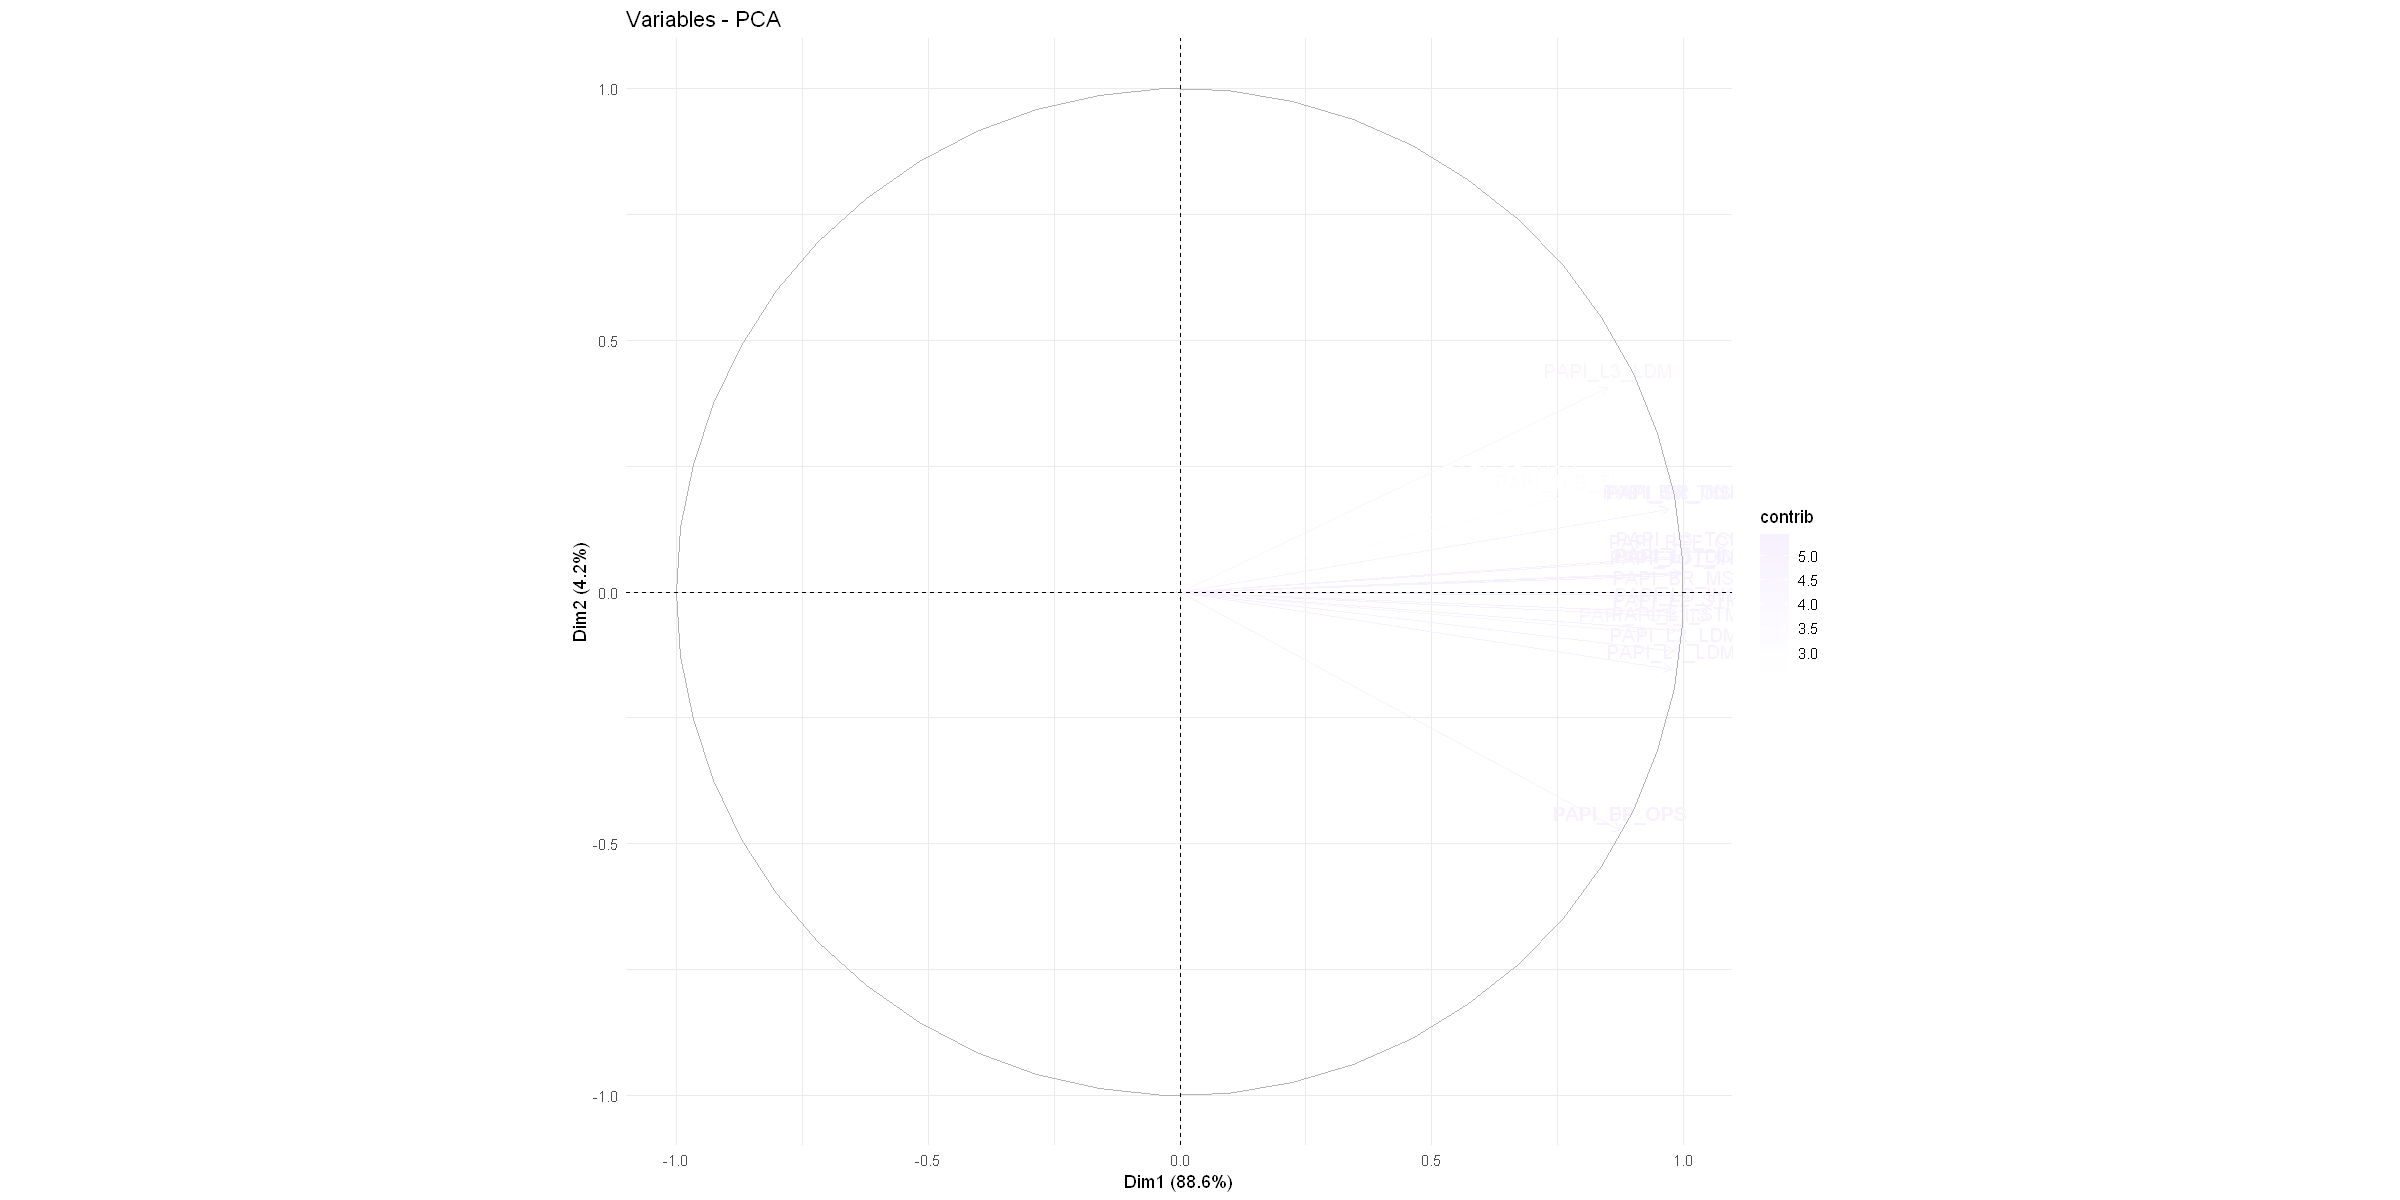

In [37]:
fviz_pca_var(res.pca, col.var="contrib") + scale_color_gradient2(low="white", mid="blue", high="red", midpoint=50) + theme_minimal()

In [38]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))

new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_MSP))




new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)
dim(res1)
round(res1, 2)

Warning message in cor(my_data_ordered1):
"the standard deviation is zero"

[1] 21 21

,PAPI_BR_CN,PAPI_BR_NTK,PAPI_BR_TKN,PAPI_BR_UCN,PAPI_DP_OPS,PAPI_FP_OPS,PAPI_L1_DCM,PAPI_L1_LDM,PAPI_L1_STM,PAPI_L2_LDM,PAPI_L2_STM,PAPI_L3_LDM,PAPI_L3_TCM,PAPI_LD_INS,PAPI_LST_INS,PAPI_REF_CYC,PAPI_SP_OPS,PAPI_SR_INS,PAPI_TLB_TL,PAPI_TOT_IIS,PAPI_TOT_INS
PAPI_BR_CN,1.00,0.74,1.00,0.65,0.77,0.77,0.97,0.90,0.97,0.91,0.97,0.85,0.98,0.93,0.97,0.98,NA,1.00,0.73,0.87,0.99
PAPI_BR_NTK,0.74,1.00,0.74,0.67,0.59,0.59,0.72,0.67,0.72,0.68,0.72,0.61,0.72,0.69,0.72,0.72,NA,0.73,0.46,0.68,0.73
PAPI_BR_TKN,1.00,0.74,1.00,0.65,0.77,0.77,0.97,0.90,0.97,0.91,0.97,0.85,0.98,0.93,0.97,0.98,NA,1.00,0.73,0.87,0.99
PAPI_BR_UCN,0.65,0.67,0.65,1.00,0.52,0.52,0.64,0.60,0.63,0.60,0.64,0.56,0.64,0.61,0.64,0.64,NA,0.65,0.40,0.61,0.65
PAPI_DP_OPS,0.77,0.59,0.77,0.52,1.00,1.00,0.85,0.93,0.90,0.91,0.89,0.55,0.83,0.88,0.85,0.84,NA,0.77,0.59,0.83,0.85
PAPI_FP_OPS,0.77,0.59,0.77,0.52,1.00,1.00,0.85,0.93,0.90,0.91,0.89,0.55,0.83,0.88,0.85,0.84,NA,0.77,0.59,0.83,0.85
PAPI_L1_DCM,0.97,0.72,0.97,0.64,0.85,0.85,1.00,0.97,0.98,0.98,0.98,0.88,1.00,0.99,1.00,1.00,NA,0.97,0.74,0.91,0.99
PAPI_L1_LDM,0.90,0.67,0.90,0.60,0.93,0.93,0.97,1.00,0.96,1.00,0.96,0.81,0.97,0.99,0.97,0.96,NA,0.90,0.71,0.91,0.94
PAPI_L1_STM,0.97,0.72,0.97,0.63,0.90,0.90,0.98,0.96,1.00,0.96,1.00,0.77,0.97,0.96,0.98,0.98,NA,0.97,0.72,0.90,0.99
PAPI_L2_LDM,0.91,0.68,0.91,0.60,0.91,0.91,0.98,1.00,0.96,1.00,0.96,0.83,0.97,1.00,0.98,0.97,NA,0.91,0.71,0.91,0.95


In [39]:
library(corrplot)


corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "AOE", number.cex = 0.5)

corrplot 0.84 loaded


ERROR: Error in eigen(corr): infinite or missing values in 'x'


In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=2)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=3)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=4)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=6)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=7)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=8)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=9)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=11)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=12)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=13)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=14)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=15)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=16)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=17)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)